## 画图前夕三部曲
#### 画布
- 通过**plt.figure**来创建一张画布——plt.figure(figsize(a,b), facecolor='r')
#### 修改中文字体
- Matplotlib中遇到中文显示方块的问题
	- 通过 plt.rcParams['font.sans-serif'] = 'Microsoft YaHei' 解决
	- 还可以设置的中文字体有SimSun（宋体），SimHei（黑体），Kaiti（楷体）等
#### 负号显示问题
- 通过 plt.rcParams['axes.unicode_minus'] = False 解决


## 造型师——样式参数
大多数绘图方法都有样式选项，可以访问当前调用绘图方法，或从Artist 上的“setter”调用。 在里面图中，我们手动设置了 颜色 、线宽和线型的plot，我们设置第二行的线型可调用 set_linestyle。


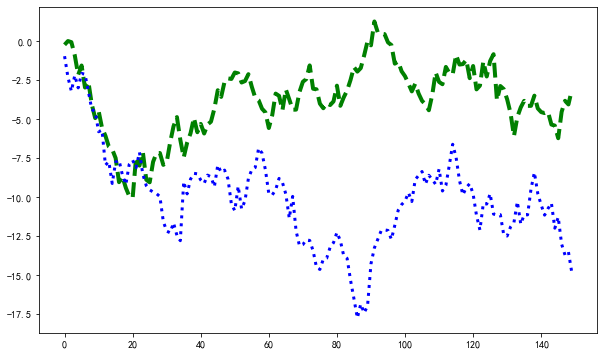

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 加载字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
# 显示负号
plt.rcParams['axes.unicode_minus'] = False

data1, data2, data3, data4 = np.random.randn(4, 150)  # 创建4个随机数据集

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='g', linewidth=4, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='b', linewidth=3)	# 此处调用了set_linestyle
l.set_linestyle(':')
plt.show()

#### 颜色
Matplotlib 有一个非常灵活的颜色数组，会采用多种颜色。 即对于一种 scatter绘图，标记的边缘与内部可以是不同的颜色：
- color——指定颜色
![在这里插入图片描述](https://img-blog.csdnimg.cn/f0417aafc4144ef18fc85c42887f287d.png)
- alpha（0-1）——透明度 
- colormap——颜色板

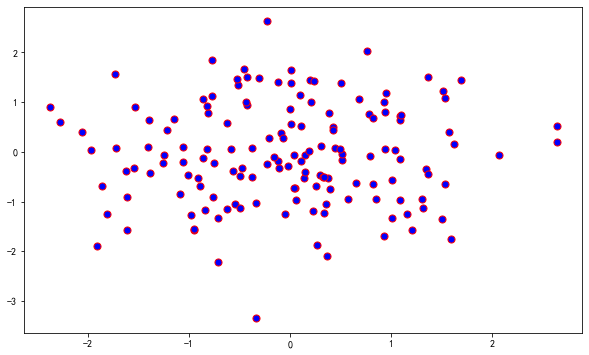

In [2]:
data1, data2, data3, data4 = np.random.randn(4, 150)  # 创建4个随机数据集
x = np.arange(len(data1))

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data1, data2, s=50, facecolor='b', edgecolor='r')	# 标记的边缘颜色为红色，内部颜色为蓝色
plt.show()

#### 线性
- linewidth——线宽，可简写为：’lw‘，设定线条的粗细
- linestyle——线型
![在这里插入图片描述](https://img-blog.csdnimg.cn/094023daf80d4ec9a10b4de0cad58cc4.png)

#### 标记
- marker——标记
- markerwidth——标记大小

- 未填充标记
![在这里插入图片描述](https://img-blog.csdnimg.cn/7a620d94c57b4278a3bad6a1e8b7f640.png)

- 填充标记
![在这里插入图片描述](https://img-blog.csdnimg.cn/f6a2e07f38924cb6af96f5cfaf86da97.png)

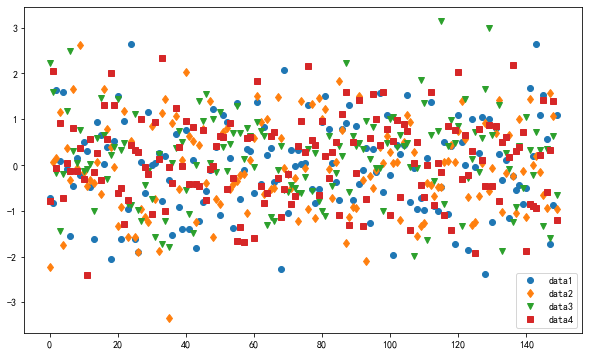

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()
plt.show()

- style参数，可以包含linestyle，marker，color

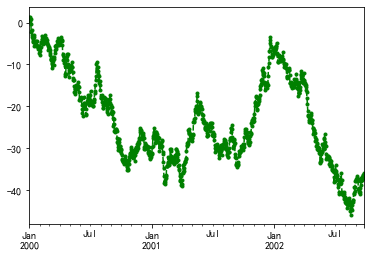

In [4]:
import pandas as pd
import numpy as np

# style参数，可以包含linestyle，marker，color

ts = pd.Series(np.random.randn(1000).cumsum(), index=pd.date_range('1/1/2000', periods=1000))
ts.plot(style='--g.')
# style → 风格字符串，这里包括了linestyle（-），marker（.），color（g）
plt.show()

## 标记地块——基本元素
#### 轴标签和文本
- set_xlabel, set_ylabel，和 set_title用于在指定位置添加文本
- 文本也可以直接使用 text 添加到绘图中

###### 添加图表标题
- 通过plt.title可以在Matplotlib设置标题
	- 字体样式可以通过fontdict进行设置
	- fontsize——设置标题大小
	- 通过loc参数可以设置标题显示位置，支持的参数有：
		- center（居中）
		- left（靠左）
		- right（靠右）

###### 添加坐标轴标题
- 添加坐标轴标题
	- 通过plt.xlabel和plt.ylabel可以分别添加x轴和y轴的标题
	- 同样可以通过fontdict进行字体样式的配置
	- fontsize——设置标题大小
	- labelpad可以设置坐标轴与标题之间的距离

###### 添加数据标签——text
可以通过plt.text对图表添加文本，但是一次只能添加一个点，所以如果要给每个数据项都添加标签的话，我们需要通过**for循环**来进行

- **plt.text** 有三个重要的参数：
	- x、y 、s，通过x和y确定显示位置，s为需要显示的文本
	- 另外还有va和ha两个参数设置文本的显示位置（靠左、靠右、居中等）
	- 空格需要用到——转字符 \
	- fontdict——设置文本字的大小和颜色，需要用 dict 形式传入

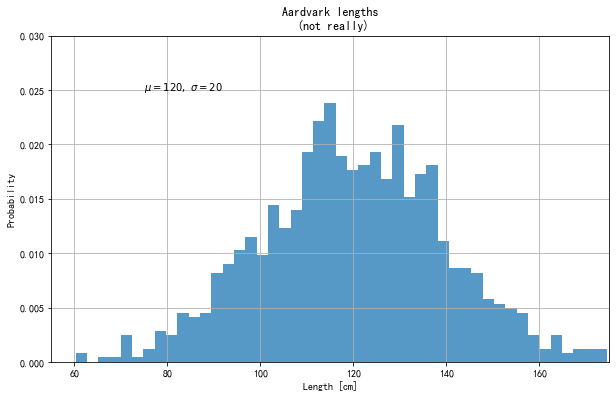

In [5]:
mu, sigma = 120, 20
x = mu + sigma * np.random.randn(1000)
fig, ax = plt.subplots(figsize=(10, 6))
# 数据的柱状图
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')    # x轴标签
ax.set_ylabel('Probability')    # y轴标签
ax.set_title('Aardvark lengths\n (not really)')     # 标题
# 在这里 r 在标题字符串之前表示该字符串是 原始 字符串，而不是将反斜杠视为 python 转义
ax.text(75, .025, r'$\mu=120,\ \sigma=20$')     # 添加文本——这里是在文本中使用数学表达式
ax.axis([55, 175, 0, 0.03])
ax.grid(True)   # 添加网格
plt.show()

#### 注释——添加文本annotate
还可以在图上标注点，通常通过连接箭头由 xytext 指向 xy
- **annotate()** 基本使用

	-  text——是注释的文本
	- xy——是需要注释的点的坐标
	- xytext——是注释文本的坐标（标注位置）
	- arrowprops——是对图中箭头类型和箭头弧度的设置，需要用 dict 形式传入
	- xycoords='data'——基于数据的值来选位置
	- textcoords='offset points'——xy偏差值

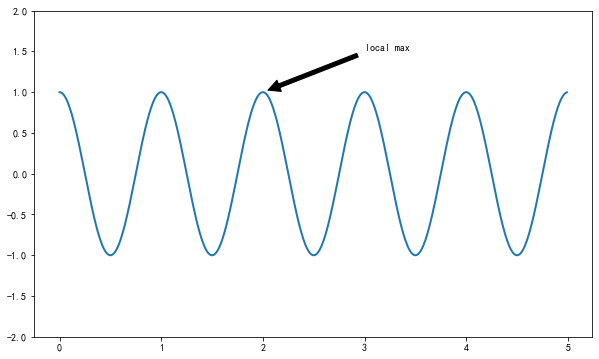

In [6]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)

fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(t, s, linewidth=2)
ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)
plt.show()

#### 传说——图例legend
通过plt.legend可以给图表添加图例，图例通常用来说明图表中数据每个系列的数据的
- legend——显示图例
- fontsize——设置字体大小
- 通过设置 handles 参数来选择图例中显示的内容
- loc——表示位置
 	- 'best'         : 0 (自适应方式)
	-  'upper right'  : 1
	-  'upper left'   : 2	
	-  'lower left'   : 3
	-  'lower right'  : 4
	-  'right'        : 5
	-  'center left'  : 6
	-  'center right' : 7
	-  'lower center' : 8
	- 'upper center' : 9
	-  'center'       : 10

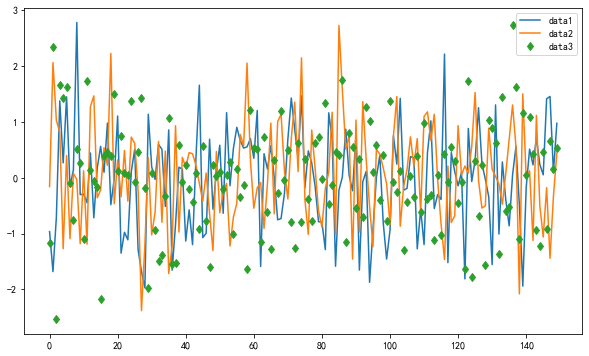

In [7]:
data1, data2, data3 = np.random.randn(3, 150)  # 创建3个随机数据集
x = np.arange(len(data1))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend(loc='best')     # 添加图例
plt.show()

#### 添加网格线——grid
- 通过可以添加网格线可以方便用户容易看出数据项的大致值，通过上述展示所有数据标签时，可能会让整个图表比较杂乱，我们可以选择使用网格线来展示数据项大致数据值
- 参数b为True时展示网格线
- axis支持x、y、both三个值，分别表示
	- x——纵向网格线
	- y——横向网格线
	- both——纵向横向

- 其余线型配置与配置折线风格的参数类似，如：线型、线宽、颜色

#### 画布留白——tight_layout() 
由于图表与 Figure 的留白不足，造成无法完整显示图例。Matplotlib 模块内有 tight_layout() 函数，可利用设定 pad 参数在图表与Figure 间设定留白（也可不用设定 pad 参数）
- plt.tight_layout()——紧缩四周空白，扩大绘图区域可用面积
- h_pad /v_pad 可以分别设定高度 / 宽度的留白

## 轴刻度和刻度
- tick params（）——设定坐标轴：
	- 刻度大小（labelsize）
	- （刻度线条）颜色（color）
	- 应用范围（axis）
- tick_params（axis='xx'，labelsize=b，color='r'） 
	- labelsize的b代表刻度大小
	- 如果 axis的xx是 both代表应用到x和y轴，如果xx是x代表应用到x轴，如果xx是y代表应用到y轴。
	- color则是设定刻度的线条颜色，例如，red 代表红色

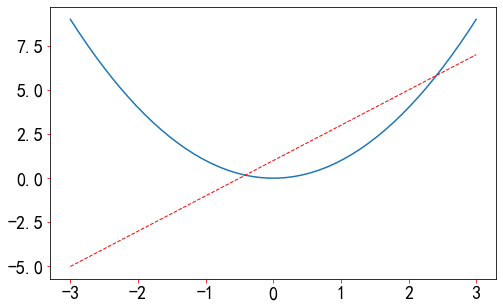

In [8]:
x = np.linspace(-3, 3, 50)
y1 = 2 * x + 1
y2 = x ** 2

plt.figure(num=3, figsize=(8, 5))
plt.plot(x, y2)
plt.plot(x, y1, color='red', linewidth=1.0, linestyle='--')
plt.tick_params(axis='both', labelsize=18, color='red')
plt.show()

#### 坐标范围及轴刻度
- 有时候，我们的坐标轴刻度可能并不是一连串的数字，而是一些文字，或者我们想要调整坐标轴的刻度的稀疏

- 这时，就需要使用plt.xticks()或者plt.yticks()来进行调整：首先，使用np.linspace定义新刻度范围以及个数：范围是(-1,2);个数是5。

	- plt.axis——同时设置x，y轴坐标范围
	- plt.xlim——设置x坐标轴范围：(-1, 2)
	- plt.ylim——设置y坐标轴范围：(-2, 3)
	- plt.xticks——设置x轴刻度以及名称：范围是(-1,2);个数是5。
	- plt.yticks——设置y轴刻度以及名称：刻度为[-2, -1.8, -1, 1.22, 3]；对应刻度的名称为[‘really bad’,’bad’,’normal’,’good’, ‘really good’]。

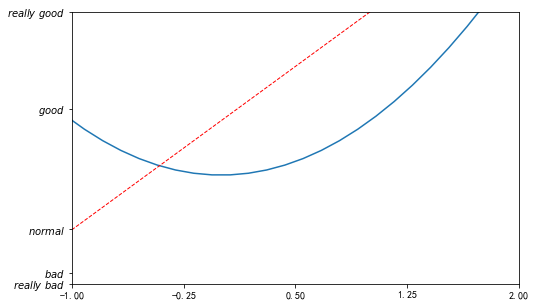

In [9]:
x = np.linspace(-3, 3, 50)
y1 = 2 * x + 1
y2 = x ** 2

plt.figure(num=3, figsize=(8, 5))
plt.plot(x, y2)
plt.plot(x, y1, color='red', linewidth=1.0, linestyle='--')

plt.axis([-1, 2, -2, 3])	# 使用 axis（）设定x，y轴的最小和最大刻度
plt.xlim((-1, 2))  # x轴坐标范围
plt.ylim((-2, 3))  # y轴坐标范围

new_ticks = np.linspace(-1, 2, 5)
plt.xticks(new_ticks)  # x轴刻度(此处亦可以设名称如条形图)
plt.yticks([-2, -1.8, -1, 1.22, 3], [r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])  # y轴刻度及名称
plt.show()

#### 调整刻度及边框位置
- 使用.xaxis.set_ticks_position设置x坐标刻度数字或名称的位置：
	- bottom.（所有位置：top，bottom，both，default，none）
- 使用.spines设置边框：x轴；使用.set_position设置边框位置：y=0的位置；（位置所有属性：outward，axes，data）

代码如下：
- ax.xaxis.set_ticks_position('bottom')
- ax.spines['bottom'].set_position(('data', 0))
示例图：
![在这里插入图片描述](https://img-blog.csdnimg.cn/41b11f3c52d34dafb92003fa4617d347.png)

- 使用.yaxis.set_ticks_position设置y坐标刻度数字或名称的位置：
	- left.（所有位置：left，right，both，default，none） 
- 使用.spines设置边框：y轴；使用.set_position设置边框位置：x=0的位置；（位置所有属性：outward，axes，data）

代码如下：
- ax.yaxis.set_ticks_position('left')
- ax.spines['left'].set_position(('data',0))
示例图：
![在这里插入图片描述](https://img-blog.csdnimg.cn/de30ba3217264bd4aea941335bcf528c.png)

#### 设置图像边框颜色
细心的小伙伴可能会注意到，我们的图像坐标轴总是由上下左右四条线组成，我们也可以对它们进行修改：
- plt.gca()——获取当前坐标轴信息
- 使用.spines——设置边框：右侧边框
- 使用.set_color——设置边框颜色：默认白色
- 使用.spines设置边框：上边框
- 使用.set_color设置边框颜色：默认白色

代码如下：
- ax = plt.gca()
- ax.spines['right'].set_color('none')
- ax.spines['top'].set_color('none')

# 放在最后
看完了知识点，也该轮到你过过“造型师”的瘾子了哟。有兴趣的小伙伴们可以结合上述所学的内容，自己动手操作一遍哦，这样才能牢牢记住！

> 一：
> 画出直线 y = x-1, 线型为虚线，线宽为1，纵坐标范围（-2，1），横坐标范围（-1，2），横纵坐标在（0，0）坐标点相交。横坐标的 [-1,-0.5,1] 分别对应 [bad, normal, good]

- 结果图：
![在这里插入图片描述](https://img-blog.csdnimg.cn/91900b1a9b5f448ebcb226cf2423ad25.png)

>二：
>x = ['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']
y = [123, 145, 152, 182, 147, 138, 189, 201, 203, 211, 201, 182] 
 要求：
     1.线型和标记点如图所示，可以参考本章内容找到相应的代码
     2.颜色设置为rgba(255, 0, 0, 0.5)
     3.线宽为2，标记尺寸为15

- 结果图：     
![在这里插入图片描述](https://img-blog.csdnimg.cn/819fbbb2f4a64579badc5fee32a0c8f2.png)